In [1]:
import numpy as np
import lightkurve as lk
import starspot as ss
import matplotlib.pyplot as plt
%matplotlib inline

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [7]:
starname = 'TIC 10863087'
lc = lk.search_lightcurve(starname).download()

/home/isy/aur/miniconda3/lib/python3.8/site-packages/lightkurve/search.py:346: LightkurveWarning: Warning: 5 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

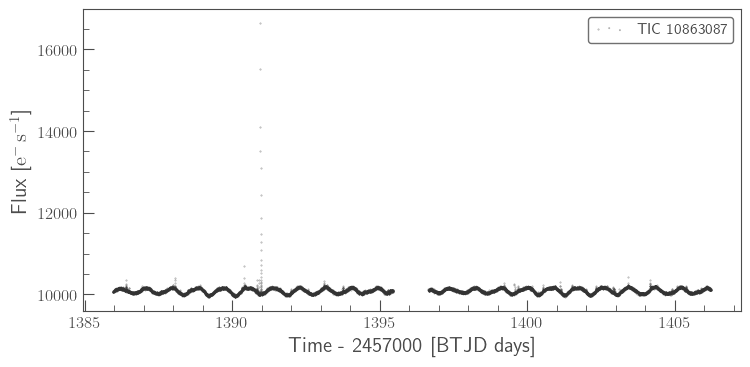

In [8]:
lc.scatter(alpha=0.5, s=0.5)

ValueError: setting an array element with a sequence.

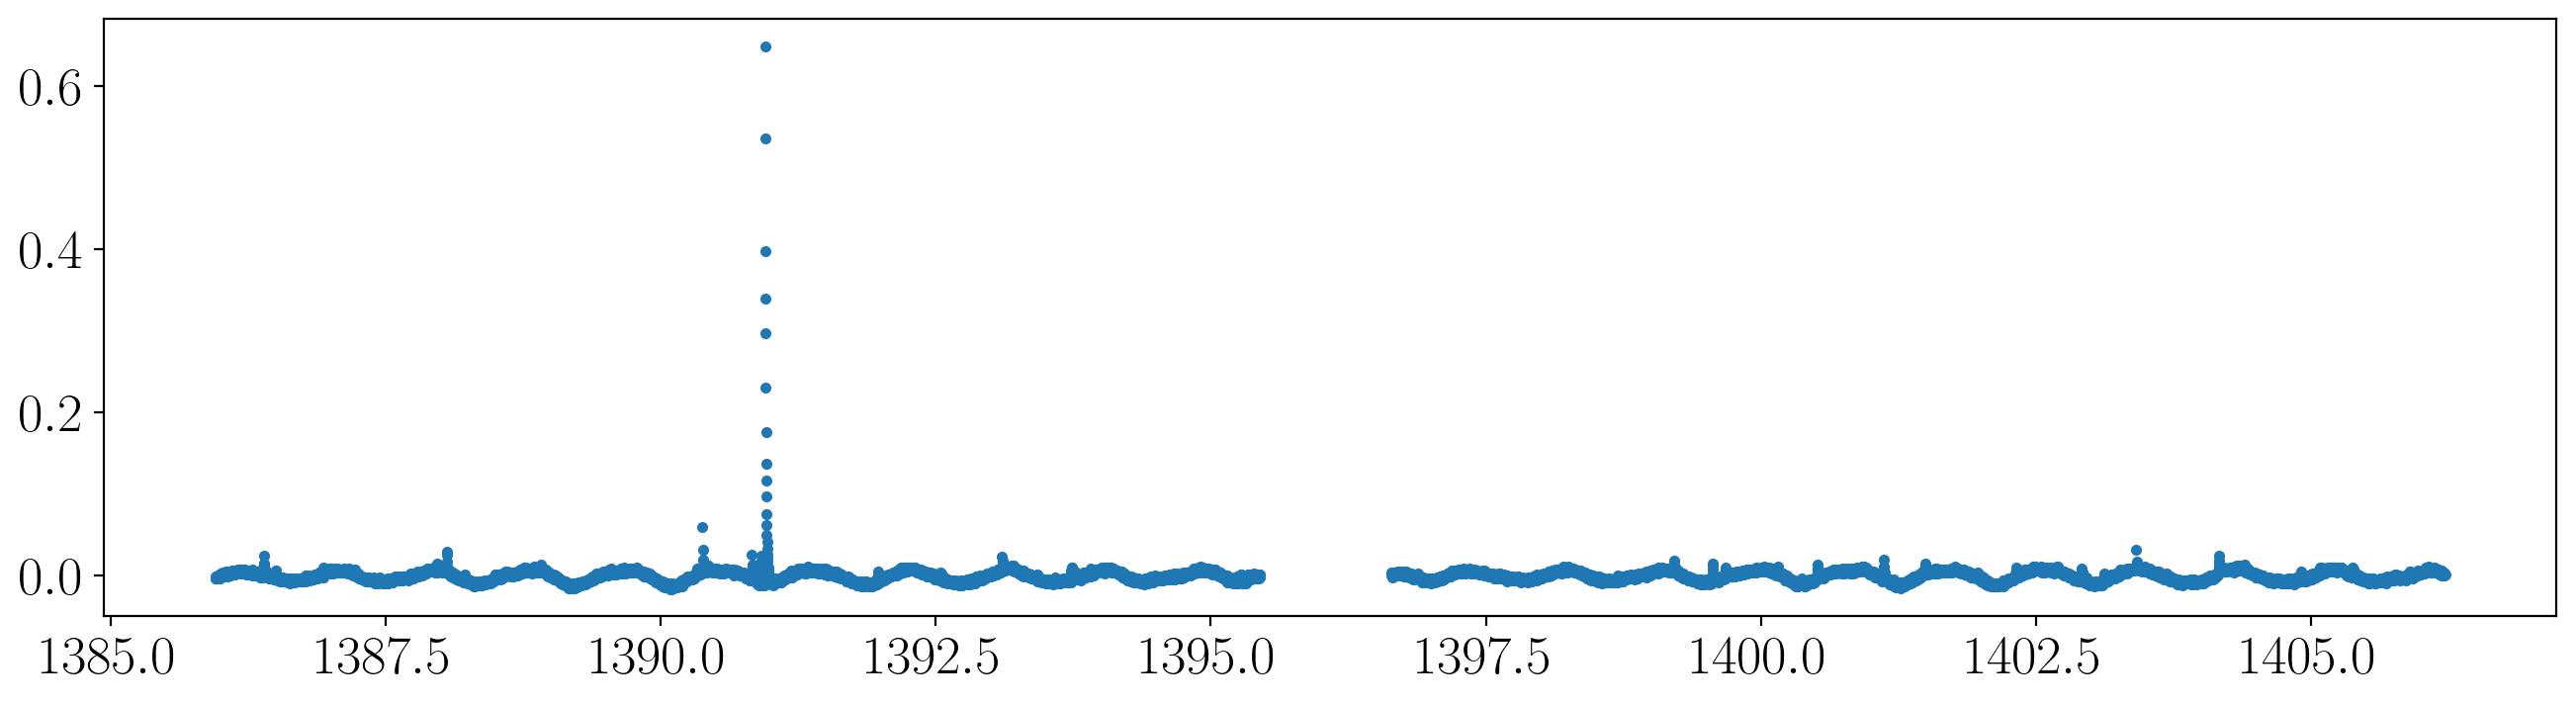

In [13]:
# Calculate the median so that we can median-normalize.
med = np.median(lc.flux)

# Do an initial sigma clip to remove big outliers.
m = ss.sigma_clip(lc.flux/med - 1, nsigma=6)
x, y, yerr = lc.time[m], lc.flux[m]/med - 1, lc.flux_err[m]/med

# Then a sigma clip using a Sav-Gol filter for smoothing
mask, smooth = ss.filter_sigma_clip(x, y, window_length=199)

time, flux, flux_err = x[mask], y[mask], yerr[mask]

plt.figure(figsize=(16, 4), dpi=200)
plt.plot(lc.time, lc.flux/med-1, ".", label="Outliers")
plt.plot(time, flux, "k.", label="Clipped")
plt.plot(x, smooth, label="Smoothed light curve")
plt.xlabel("Time [days]")
plt.ylabel("Flux");
plt.ylim(-.02, .02);
plt.legend(loc="lower right", fontsize=15);